In [1]:
import numpy, scipy.optimize

In [2]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt) #random time axis
    yy = numpy.array(yy) #random vert axis
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

Amplitude=1.0529476669738254, Angular freq.=2.0517095693819893, phase=0.08217256817188938, offset=4.0339999528626205, Max. Cov.=0.010568359326037596


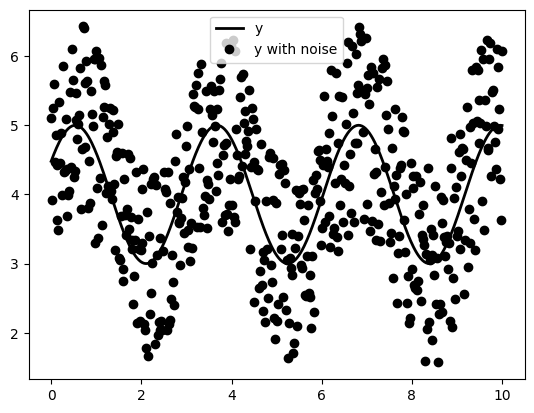

In [5]:
import pylab as plt

N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = numpy.linspace(0, 10, N)
tt2 = numpy.linspace(0, 10, 10*N)
yy = amp*numpy.sin(omega*tt + phase) + offset
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
#plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()